#### important for labtest2 2(B,C,F,H) 3(E,G) 4(B,C,D,E,F,H)

### 2A

In [100]:
with open("CH2A.txt","r") as file:
    r,d = [int(i) for i in file.readline().split(" ")]
    dnas = [dna.replace("\n","") for dna in file.readlines() ]

#print(dnas)
#print(r, type(r))
kmers= []

def createkmer(kmer, k):
    if len(kmer) == k :
        kmers.append(kmer)
        return
    createkmer(kmer + 'A',k)
    createkmer(kmer + 'C',k)
    createkmer(kmer + 'G',k)
    createkmer(kmer + 'T',k)

#createkmer("",3)
def hamdis(dna1,dna2):
    return sum([1 for x,y in zip(dna1,dna2) if x!=y])
#print(hamdis("AACCT","ACCTC"))

def motifEnumeration(k,d, dnas):
    createkmer("",k)
    ans = []
    #print(*kmers)
    for kmer in kmers:
        count =0
        for dna in dnas:
            dis = len(dna)
            for i in range(len(dna)-k+1):
                dis = min(dis, hamdis( dna[i:i+k], kmer))
            count = max(count,dis)
        if count <= d:
            ans.append(kmer)
    return ans


motifEnumeration(r,d,dnas)

['ATA', 'ATT', 'GTT', 'TTT']

### 2B

In [48]:
# inputs
# 3
# AAATTGACGCAT
# GACGACCACGTT
# CGTCAGCGCCTG
# GCTGAGCACCGG
# AGTACGGGACAG
# ans : GAC

with open("CH2B.txt","r") as file:
    r = int(file.readline())
    #print(r,type(r))
    dnas = [dna.replace("\n","") for dna in file.readlines()]

kmers= []
def createkmer(kmer, k):
    if len(kmer)==k :
        kmers.append(kmer)
        return
    createkmer(kmer + "A", k)
    createkmer(kmer + "C", k)
    createkmer(kmer + "G", k)
    createkmer(kmer + "T", k)

def hamdis(dna1,dna2):
    return sum([1 for x,y in zip(dna1,dna2) if x!=y ])

def minDis(dna, kmer):
    d = len(dna)
    k = len(kmer)
    for i in range(len(dna)-k+1):
        d = min(d, hamdis( dna[i:i+k], kmer))
    return d




def medString(k, dnas):
    createkmer("",k)
    count = len(dnas[0])
    ans = dnas[0]
    for kmer in kmers :
        dis =0 
        for dna in dnas :
            dis += minDis(dna,kmer) 
        if dis < count :
            ans = kmer 
            count = dis 
    print(ans)

medString(r,dnas)


GGTAGG


### 2C

In [98]:
with open("CH2C.txt","r") as file:
    kmers = file.readline().replace("\n","")
    k = int(file.readline())
    
    matrix = [[float(i) for i in row.replace("\n","").split(" ")] for row in file.readlines()]
    profile = {
        'A' : matrix[0],
        'C' : matrix[1],
        'G' : matrix[2],
        'T' : matrix[3]
    }
pro = profile
print(kmers)

# kmers = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
# k = 5
# profile = {
#     'A' :[0.2, 0.2, 0.3, 0.2, 0.3],
#     'C' :[0.4, 0.3, 0.1, 0.5, 0.1],
#     'G' :[0.3, 0.3, 0.5, 0.2, 0.4],
#     'T' :[0.1, 0.2, 0.1, 0.1, 0.2]
# }
#print(profile)
dict = {}
def probKmer(kmers,k,profile):
    ans = -1 
    pattern = kmers
    
    for i in range(len(kmers) - k+1):
        kmer = kmers[i:i+k] 
        count = 1
        for j in range(k):
            count *= profile[kmer[j]][j]
        dict[kmer]= count
        if ans < count :
            ans = count 
            pattern = kmer
        
    print(pattern)
    

probKmer(kmers,k,profile)
#print(dict)

ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT
CCGAG


<BarContainer object of 46 artists>

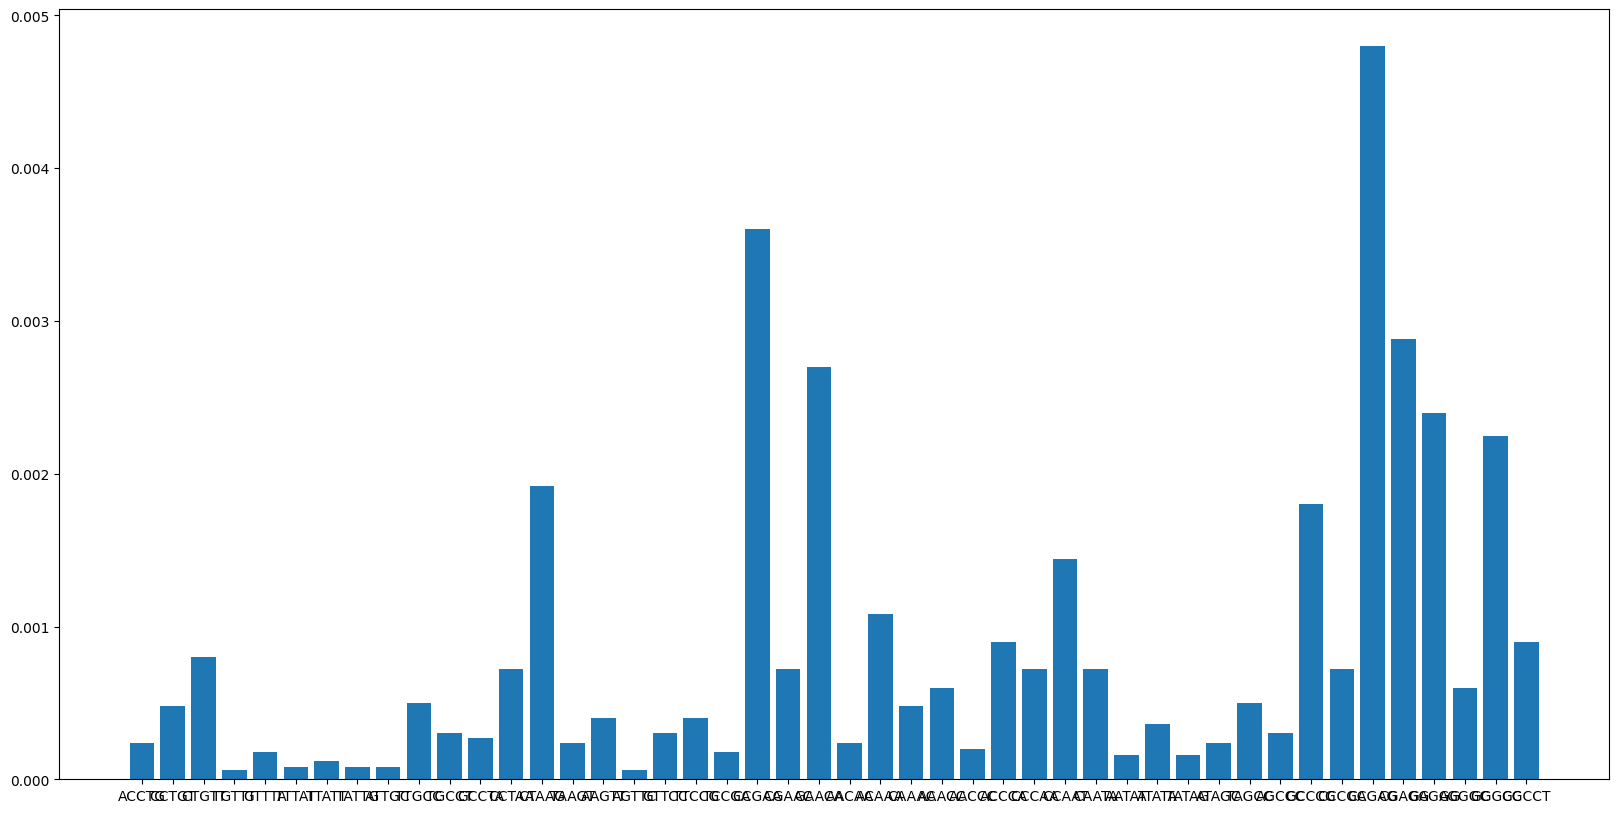

In [81]:
import matplotlib.pyplot as plt 
#plt.plot(dict)
plt.figure(figsize=(20,10))
plt.bar(dict.keys(), dict.values())

### 2H

In [118]:
with open("CH2H.txt",'r') as file:
    pattern = file.readline().replace("\n","")
    dnas = [dna for dna in file.readline().split(" ")]
    # dnas = [dna.replace("\n","") for dna in file.readline().split(" ")]
dnas

def hamdis(dna1,dna2):
    return sum([1 for x,y in zip(dna1,dna2) if x!=y])

def patString(pattern, dnas):
    count =0 

    for dna in dnas:
        dis = len(dna)
        for i in range(len(dna)- len(pattern)+1):
            dis = min(dis, hamdis(dna[i:i+len(pattern)], pattern))
        count +=dis
    print(count)

patString(pattern,dnas)


5


### 3E

In [21]:
with open("CH3E.txt",'r') as file:
    dnas = [dna.replace("\n","") for dna in file.readlines()]
#dnas 

def deBruijn(dnas):
    dict = {}
    for dna in dnas :
        pre = dna[:-1]
        suf = dna[1:]
        if pre not in dict.keys():
            dict[pre] = []

        dict[pre].append(suf)
    #print(dict)
    for key, value in dict.items() :
        #print(f"{key} -> {','.join(value)} ")
        print(key,  "->", end=" "); print(*value, sep= ',')

deBruijn(dnas)

GAG -> AGG
CAG -> AGG,AGG
GGG -> GGG,GGA
AGG -> GGG
GGA -> GAG
GAG -> AGG
CAG -> AGG,AGG
GGG -> GGG,GGA
AGG -> GGG
GGA -> GAG


### 3G

### 4B

In [38]:
%pip install biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
from Bio.Seq import Seq 

In [60]:
with open("CH4B.txt","r") as file :
    dna = file.readline().replace("\n","")
    acid = file.readline().replace("\n","")
#print(dna)
#acid
n = len(dna)
k = len(acid)*3

ans = [ ]
for i in range(n-k+1):
    sub = dna[i:i+k]
    if acid == Seq(sub).translate() or acid == Seq(sub).reverse_complement().translate() :
        print(sub)

    

ATGGCC
GGCCAT
ATGGCC


### 4C

In [23]:
value = {
      'G': 57,
      'A': 71,
      'S': 87,
      'P': 97,
      'V': 99,
      'T': 101,
      'C': 103,
      'I': 113,
      'N': 114,
      'D': 115,
      'K': 128,
      'Q': 128,
      'E': 129,
      'M': 131,
      'H': 137,
      'F': 147,
      'R': 156,
      'Y': 163,
      'W': 186,
      'L': 113,
  }

acid = "LEQN"

def masscal(acid):
    mass = [0]
    acid2 = acid+ acid
    for idx in range(len(acid)):
        count =0
        for ln in range(len(acid)-1):
            count += value[acid2[idx+ln]] 
            mass.append(count)
    t =0 
    for a in  acid :
        t += value[a]
    mass.append(t)        
    return mass

print(sorted(masscal(acid)))

[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]


### 4D

In [64]:
values = [57,71,87,97,99,101,103,113,114,115,128,129,131,137,147,156,163,186]
total = 1024
dp= [0]*(total+1)
dp[0]= 1 

for i in range(total+1):
    count =0
    for val in values:
        if i>= val :
            count += dp[i-val]
        
    dp[i] += count 
dp[total]

14712706211

### 4F

In [75]:
values = {
    'N': 114,
    'Q': 128,
    'E': 129,
    'L': 113
}
mass = [0]
acid = "NQEL"
n = len(acid)
acid2 = acid+acid
for idx in range(n):
    count =0
    for ln in range(n-1):
        count += values[acid2[idx+ln]]
        mass.append(count)

t=0 
for a in acid:
    t += values[a]
mass.append(t)
mass = sorted(mass)
S = [0, 99, 113, 114, 128, 227, 257, 299, 355, 356, 370, 371, 484]
cnt =0
for i in S :
    if i  in mass:
        cnt +=1
cnt
mass

[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]

### Pracatice

In [76]:
total = 1024
dp = [0]*( total+1)
dp[0] =1 
V = [57,71,87,97,99,101,103,113,114,115,128,129,131,137,147,156,163,186]

for i in range(total+1):
    c =0
    for val in V:
        if val<=i :
            c += dp[i-val]
    dp[i] +=c 
dp[total]


14712706211